In [94]:
# open dataframe.pkl from C:\Users\leona\OneDrive\Documents\GitHub\complexity_72h\Dataset\dataframe.pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter
# svg output in plots
import tqdm as tqdm
from itertools import chain
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# change default font for plot in serif
plt.rcParams["font.family"] = "serif"


In [ ]:
# define a color palette array #D81B60 #1E88E5 #FFC107 #004D40 #11C0AE
color_palette = ['#D81B60', '#1E88E5', '#FFC107', '#004D40', '#11C0AE']

In [2]:
with open(r"../Dataset/dataframe.pkl", 'rb') as fp:
    df=pickle.load(fp)

In [3]:
# open the same file with pandas
df = pd.read_pickle(r"../Dataset/dataframe.pkl")


In [4]:
df.head()

,Time,Simplices
0,1987.0,[1.0]
1,2007.0,[2.0]
2,2011.0,"[4.0, 3.0]"
3,1998.0,[5.0]
4,1985.0,"[7.0, 8.0, 6.0]"


In [5]:
# cast int every time
df['Time'] = df['Time'].astype(int)
df

,Time,Simplices
0,1987,[1.0]
1,2007,[2.0]
2,2011,"[4.0, 3.0]"
3,1998,[5.0]
4,1985,"[7.0, 8.0, 6.0]"
...,...,...
1590330,1995,[834497.0]
1590331,2014,"[1261125.0, 156322.0, 1261126.0]"
1590332,2015,"[610947.0, 1261128.0, 1086071.0, 1261127.0]"
1590333,2015,"[1261129.0, 176076.0]"


In [6]:
def to_int(lista):
    return [int(i) for i in lista]

# apply to_int to every element of the column
df['Simplices'] = df['Simplices'].apply(to_int)

In [7]:
df.head()

,Time,Simplices
0,1987,[1]
1,2007,[2]
2,2011,"[4, 3]"
3,1998,[5]
4,1985,"[7, 8, 6]"


# Papers per year

In [8]:
# first and last timestamp
print('Fist timestamp: ')
print(df['Time'].min())
print('Last timestamp: ')
print(df['Time'].max())

Fist timestamp: 
1800
Last timestamp: 
2018


In [9]:
# print the number of paper per year
# for every time in df['Time'] count the number of Simplices

years = df['Time'].unique()

# create a dictionary with year as key and number of simplices as value
paper_per_year = {}
for year in years:
    paper_per_year[year] = df[df['Time'] == year].shape[0]
    


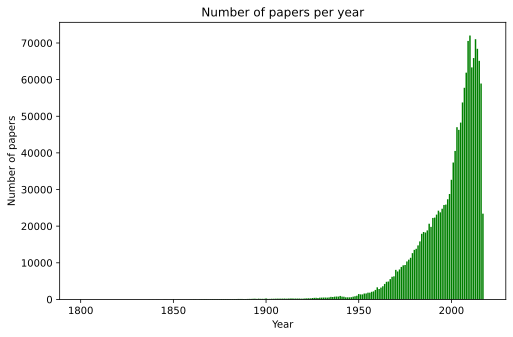

In [10]:
# plot the number of paper per year
plt.figure(figsize=(8,5))
plt.bar(paper_per_year.keys(), paper_per_year.values(), color='g')
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Number of papers per year')
plt.show()

# Paper per size

In [11]:
# create a new column that is the len of df['Simplices']
df['Size'] = df['Simplices'].apply(lambda x: len(x))

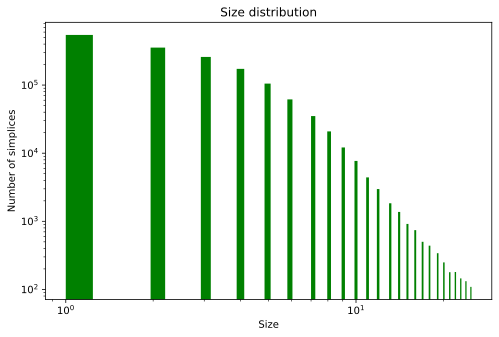

In [12]:
# plot size distribution
plt.figure(figsize=(8,5))
plt.hist(df['Size'], bins=100, color='g')
plt.xlabel('Size')
plt.ylabel('Number of simplices')
plt.yscale('log')
plt.xscale('log')
plt.title('Size distribution')
plt.show()

# Paper per author

In [13]:
# flatten this list(df['Simplices'])
simplices = [item for sublist in df['Simplices'].values.reshape(-1,1) for item in sublist]
# flatten simplices that is a list of lists
node_list_with_repetitions = [item for sublist in simplices for item in sublist]
nodes = set([item for sublist in simplices for item in sublist])

In [14]:
node_occurencies = Counter(node_list_with_repetitions)
    

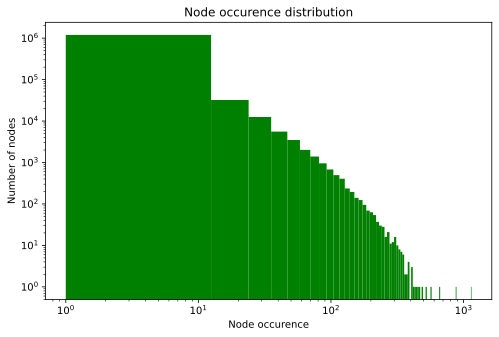

In [15]:
# print node occurence distribution
plt.figure(figsize=(8,5))
plt.hist(node_occurencies.values(), bins=100, color='g')
plt.xlabel('Node occurence')
plt.ylabel('Number of nodes')
plt.yscale('log')
plt.xscale('log')
plt.title('Node occurence distribution')
plt.show()


# Pruning

In [16]:
# reduce the dataset up to year 2000
upper_bound = 1950
df_pruned = df[df['Time'] <= upper_bound]
df_pruned.head()

,Time,Simplices,Size
27,1873,[58],1
109,1936,"[304, 303]",2
118,1931,[326],1
181,1926,"[515, 514]",2
193,1917,"[548, 547]",2


In [17]:
# reduce the dataset from to year 2000
lower_bound = 1950
df_pruned_inv = df[df['Time'] >= lower_bound]
df_pruned_inv.head()

,Time,Simplices,Size
0,1987,[1],1
1,2007,[2],1
2,2011,"[4, 3]",2
3,1998,[5],1
4,1985,"[7, 8, 6]",3


In [18]:
df_pruned_inv

,Time,Simplices,Size
0,1987,[1],1
1,2007,[2],1
2,2011,"[4, 3]",2
3,1998,[5],1
4,1985,"[7, 8, 6]",3
...,...,...,...
1590330,1995,[834497],1
1590331,2014,"[1261125, 156322, 1261126]",3
1590332,2015,"[610947, 1261128, 1086071, 1261127]",4
1590333,2015,"[1261129, 176076]",2


In [19]:
# flatten this list(df['Simplices'])
simplices = [item for sublist in df_pruned['Simplices'].values.reshape(-1,1) for item in sublist]
# flatten simplices that is a list of lists
node_list_with_repetitions = [item for sublist in simplices for item in sublist]
nodes_till_upper_bound = set([item for sublist in simplices for item in sublist])

In [20]:
# node after upper bound are nodes - nodes_till_upper_bound
nodes_after_upper_bound = nodes - nodes_till_upper_bound

In [21]:
# check len of nodes = len of nodes_till_upper_bound + len of nodes_after_upper_bound

print(len(nodes) == len(nodes_till_upper_bound) + len(nodes_after_upper_bound))

# print their len
print(len(nodes_till_upper_bound))
print(len(nodes_after_upper_bound))

True
17788
1238597


In [22]:
# creat a dictionary with keys nodes in nodes_till_upper_bound 
first_appearence_dict = {}

df.sort_values(by=['Time'], inplace=True)
# loop over time from upper_bound till time max, if a node appear for the first time, add it to the dictionary
for time in range(upper_bound, int(df['Time'].max() )+1):
    nodes_in_this_year = set(list(chain(*list(df[df['Time'] == time]['Simplices'])) ) )
    for node in nodes_in_this_year:
        if node not in nodes_till_upper_bound:
            first_appearence_dict[int(node)] = int(time )    


In [23]:
# print first 5 elements of the dictionary
list(first_appearence_dict.items())[:5]

[(475136, 1951),
 (475137, 1951),
 (1089550, 1951),
 (90137, 1954),
 (860198, 1953)]

# Dataset Authors vs years

In [24]:
# create an empty dataset with rows nodes_after_upper_bound and colums years from upper_bound to time max
df_authors_years = pd.DataFrame(index=nodes_after_upper_bound, columns=range(upper_bound, int(df['Time'].max() )+1))

# ever elemet of the df is a empty list
df_authors_years = df_authors_years.applymap(lambda x: [])

df_authors_years.head()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
3,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
5,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [25]:
# for index in index of df_pruned_inv read simplices and for every node in simplices df_authors_years[node][year] = index

for index in tqdm.tqdm(df_pruned_inv.index):
    for node in df_pruned_inv['Simplices'][index]:
        if node in nodes_after_upper_bound:
            time = df_pruned_inv['Time'][index]
            # print(time)
            # print(df_pruned_inv['Simplices'][index])

            df_authors_years[time][node].append(index)



100%|██████████| 1563854/1563854 [01:00<00:00, 25847.99it/s]


In [26]:
df_authors_years

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],[],[],[],[],[],...,[],[],[370566],[],[],[],[],[],[],[]
3,[],[],[],[],[],[],[],[],[],[],...,"[196859, 475214, 622246, 698571, 909621, 95501...","[203975, 253975, 340418, 454927, 647973, 75400...","[2, 37334, 1222945, 1545830]","[80489, 299209, 554441, 1277496]","[397639, 696235, 702051, 814662, 1148053, 1581...","[67831, 287536, 1249616]","[120538, 1546017]","[632010, 680713, 1030226, 1084807, 1385280]","[358795, 480568]",[]
4,[],[],[],[],[],[],[],[],[],[],...,[],[983724],[2],[],[],[128154],"[81636, 1102121]",[],[],[]
5,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261125,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[1590331],[],[],[],[]
1261126,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[1590331],[],[],[],[]
1261127,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[1590332],[],[],[]
1261128,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[1590332],[],[],[]


# Papers per year

In [75]:
# define a function that has the dataframe index as input, and return for every column the len of the list

def count_papers(x, normalized_by_start_year=False):
    if normalized_by_start_year:
        res_dict = {i:len(df_authors_years[df_authors_years.index == x][i].values[0]) for i in range(upper_bound, int(df['Time'].max() )+1)}

        # find the key with the first > 0 value
        for key, value in res_dict.items():
            if value > 0:
                first_year = key
                break
        
        # find the key with the last > 0 value
        for key, value in reversed(res_dict.items()):
            if value > 0:
                last_year = key
                break

        # keep the keys that go from first_year to last_year
        res_dict = {key:value for key, value in res_dict.items() if key >= first_year and key <= last_year}
        
        # in the normalize dict keys goes from 0 to last_year - first_year
        normalized_dict = {i:0 for i in range(0, last_year - first_year + 1)}


        # fill the normalized dict with the values of the res_dict
        for key, value in res_dict.items():

            normalized_dict[key - first_year] = value

        return normalized_dict

    else:  
        return {i:len(df_authors_years[df_authors_years.index == x][i].values[0]) for i in range(upper_bound, int(df['Time'].max() )+1)}

In [103]:
paper_over_career_dict = {}
for index in tqdm.tqdm(df_authors_years.index[:10000]):
    paper_over_career_dict[index] = count_papers(index, normalized_by_start_year=True)


100%|██████████| 10000/10000 [10:11<00:00, 16.35it/s]


In [104]:
with open ('paper_over_career_dict_10000.pickle', 'wb') as f:
    pickle.dump(paper_over_career_dict, f)  

In [105]:
with open ('paper_over_career_dict_10000.pickle', 'rb') as f:
    paper_over_career_dict = pickle.load(f) 

In [106]:
print(len(paper_over_career_dict))

10000


In [107]:
# make a copy of the dictionary
paper_over_career_dict_ext = paper_over_career_dict.copy()
# print first 5 elements of the dictionary
paper_over_career_dict_ext[1]

{0: 1, 1: 1, 2: 0, 3: 4, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1}

In [108]:
# fin the average duration of a career
average_duration = np.mean([len(paper_over_career_dict[i]) for i in paper_over_career_dict_ext.keys()])
print(average_duration)

16.0616


In [109]:
# find the maximum duration of a career
max_duration = 0
for key, value in paper_over_career_dict.items():
    if len(value) > max_duration:
        max_duration = len(value)
print(max_duration)
# modify paper_over_career_dict so that every list has the same length
for key, value in paper_over_career_dict_ext.items():
    if len(value) < max_duration:
        value.update( {i:0 for i in np.linspace(len(value),max_duration,max_duration-len(value)+1)})



66


In [110]:
# from paper_over_career_dict_ext, find median and 90 percentile for every normalized year over authors
median_dict = {}
mean_dict = {}
variance_dict = {}
up_percentile_dict = {}
low_percentile_dict = {}
for i in range(0, max_duration):
    median_dict[i] = np.median([value[i] for key, value in paper_over_career_dict_ext.items()])
    mean_dict[i] = np.mean([value[i] for key, value in paper_over_career_dict_ext.items()])
    variance_dict[i] = np.sqrt(np.var([value[i] for key, value in paper_over_career_dict_ext.items()]) )*2
    up_percentile_dict[i] = np.percentile([value[i] for key, value in paper_over_career_dict_ext.items()], 95)
    low_percentile_dict[i] = np.percentile([value[i] for key, value in paper_over_career_dict_ext.items()], 5)
# print dictionary
print(median_dict)
print(mean_dict)
print(up_percentile_dict)
print(low_percentile_dict)

{0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0}
{0: 1.3264, 1: 0.5548, 2: 0.6536, 3: 0.705, 4: 0.7462, 5: 0.7885, 6: 0.8279, 7: 0.8894, 8: 0.9187, 9: 0.9305, 10: 0.9639, 11: 0.9588, 12: 0.987, 13: 0.9916, 14: 0.9638, 15: 0.9691, 16: 0.9581, 17: 0.9584, 18: 0.9008, 19: 0.8944, 20: 0.8617, 21: 0.8195, 22: 0.7989, 23: 0.7654, 24: 0.7251, 25: 0.6918, 26: 0.6271, 27: 0.5714, 28: 0.551, 29: 0.5017, 30: 0.4602, 31: 0.423, 32: 0.3781, 33: 0.3407, 34: 0.308, 35: 0.272

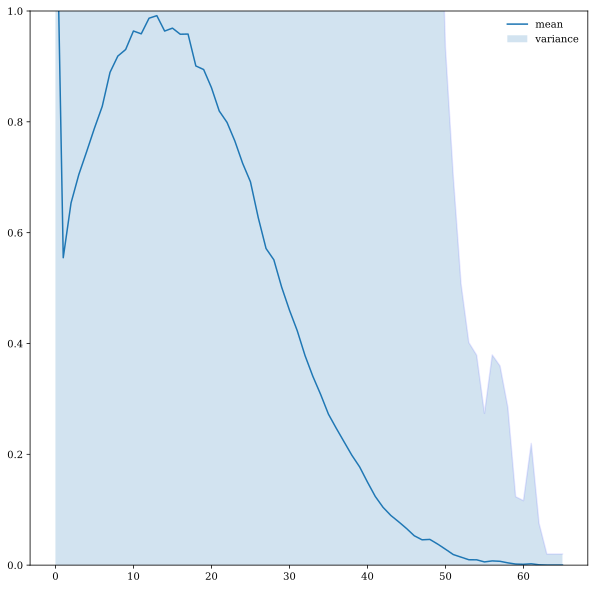

<Figure size 640x480 with 0 Axes>

In [111]:
# plot median, 90 percentile and 10 percentile
plt.figure(figsize=(10,10))
plt.plot(list(mean_dict.keys()), list(mean_dict.values()), label='mean')
# plot line mean + variance and mean - variance
plt.plot(list(mean_dict.keys()), [mean_dict[i] + variance_dict[i] for i in mean_dict.keys()],c = 'b', alpha =.1 )
plt.plot(list(mean_dict.keys()), [mean_dict[i] - variance_dict[i] for i in mean_dict.keys()], )
plt.ylim(0,1)
plt.fill_between(list(mean_dict.keys()), [mean_dict[i] + variance_dict[i] for i in mean_dict.keys()], [mean_dict[i] - variance_dict[i] for i in mean_dict.keys()], alpha=0.2, label='variance')
#plt.fill_between(list(median_dict.keys()), list(up_percentile_dict.values()), list(low_percentile_dict.values()), alpha=0.2, label='90 percentile')
plt.legend(frameon=False)
plt.show()
# save figure


plt.savefig('../Figures/avg_paper_over_career.svg', dpi=300)

# Average collaborators per year

In [112]:
# define a function that has the dataframe index as input, and return for every column the len of the list

def count_average_coauthors(x, normalized_by_start_year=False):
    if normalized_by_start_year:
        res_dict = {i: np.mean([df_pruned_inv['Size'][paper] for paper in df_authors_years[df_authors_years.index == x][i].values[0] ]) for i in range(upper_bound, int(df['Time'].max() )+1)}

        # find the key with the first > 0 value
        for key, value in res_dict.items():
            if value > 0:
                first_year = key
                break
        
        # find the key with the last > 0 value
        for key, value in reversed(res_dict.items()):
            if value > 0:
                last_year = key
                break

        # keep the keys that go from first_year to last_year
        res_dict = {key:value for key, value in res_dict.items() if key >= first_year and key <= last_year}
        
        # in the normalize dict keys goes from 0 to last_year - first_year
        normalized_dict = {i:0 for i in range(0, last_year - first_year + 1)}


        # fill the normalized dict with the values of the res_dict
        for key, value in res_dict.items():

            normalized_dict[key - first_year] = value

        return normalized_dict

    else:  
        return {i: np.mean([df_pruned_inv['Size'][paper] for paper in df_authors_years[df_authors_years.index == x][i].values[0] ]) for i in range(upper_bound, int(df['Time'].max() )+1)}

In [113]:
coauthors_over_career_dict = {}
for index in tqdm.tqdm(df_authors_years.index[:10000]):
    coauthors_over_career_dict[index] = count_average_coauthors(index, normalized_by_start_year=True)


  0%|          | 0/10000 [00:00<?, ?it/s]

c:\Users\leona\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\leona\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 10000/10000 [08:49<00:00, 18.90it/s]


In [114]:
with open ('coauthors_over_career_dict_10000.pickle', 'wb') as f:
    pickle.dump(coauthors_over_career_dict, f)  

In [115]:
with open ('coauthors_over_career_dict_10000.pickle', 'rb') as f:
    coauthors_over_career_dict = pickle.load(f)

In [116]:
print(len(coauthors_over_career_dict))

10000


In [ ]:
# plt.figure(figsize=(8,5))
# for author in coauthors_over_career_dict.keys():
#     plt.plot(list(coauthors_over_career_dict[author].keys()), list(coauthors_over_career_dict[author].values()), alpha=0.1, color='blue')

# plt.xlabel('Years from first publication')
# plt.ylabel('Average number of coauthors')

In [47]:
# do coauthors_over_career_dict_ext
coauthors_over_career_dict_ext = coauthors_over_career_dict.copy()
# find the maximum duration of a career
max_duration = 0
for key, value in coauthors_over_career_dict.items():
    if len(value) > max_duration:
        max_duration = len(value)
print(max_duration)
# modify paper_over_career_dict so that every list has the same length
for key, value in coauthors_over_career_dict_ext.items():
    if len(value) < max_duration:
        value.update( {i:np.nan for i in np.linspace(len(value),max_duration,max_duration-len(value)+1)})
# print dictionary
#coauthors_over_career_dict_ext[1]



67


In [48]:
# calculate median, mean, variance, 90 percentile and 10 percentile
median_dict = {}
mean_dict = {}
variance_dict = {}
up_percentile_dict = {}
low_percentile_dict = {}
for i in range(0, 41):
    median_dict[i] = np.median([value[i] for key, value in coauthors_over_career_dict_ext.items() if not np.isnan(value[i]) ])
    mean_dict[i] = np.mean([value[i] for key, value in coauthors_over_career_dict_ext.items() if not np.isnan(value[i]) ])
    variance_dict[i] = np.sqrt(np.var([value[i] for key, value in coauthors_over_career_dict_ext.items() if not np.isnan(value[i]) ]) )*2
    up_percentile_dict[i] = np.percentile([value[i] for key, value in coauthors_over_career_dict_ext.items() if not np.isnan(value[i])], 95)
    low_percentile_dict[i] = np.percentile([value[i] for key, value in coauthors_over_career_dict_ext.items() if not np.isnan(value[i]) ], 5)
# print dictionary
print(median_dict)
print(mean_dict)
print(variance_dict)
print(up_percentile_dict)
print(low_percentile_dict)




{0: 3.0, 1: 4.0, 2: 4.0, 3: 4.0, 4: 4.0, 5: 4.0, 6: 4.0, 7: 4.0, 8: 4.0, 9: 4.0, 10: 4.0, 11: 4.0, 12: 4.0, 13: 4.0, 14: 4.0, 15: 4.0, 16: 4.0, 17: 4.0, 18: 4.0, 19: 4.0, 20: 4.0, 21: 4.0, 22: 4.0, 23: 4.0, 24: 4.0, 25: 4.0, 26: 4.0, 27: 4.0, 28: 4.0, 29: 4.0, 30: 4.0, 31: 4.0, 32: 4.0, 33: 4.0, 34: 4.0, 35: 4.0, 36: 4.0, 37: 4.0, 38: 4.0, 39: 4.0, 40: 4.0}
{0: 4.006502097603484, 1: 4.234049435545902, 2: 4.268638216589363, 3: 4.282324654945106, 4: 4.33866713772306, 5: 4.339053032388192, 6: 4.402524721900755, 7: 4.420775947742758, 8: 4.453258959434416, 9: 4.491967385387933, 10: 4.439938744875208, 11: 4.4839576924343225, 12: 4.554110838202769, 13: 4.585863237581607, 14: 4.663448347035611, 15: 4.622262381092429, 16: 4.62065606559749, 17: 4.598524873077685, 18: 4.627884621597308, 19: 4.701960286979476, 20: 4.707271538078127, 21: 4.668353429837857, 22: 4.542124759879888, 23: 4.651163163780824, 24: 4.735367104356921, 25: 4.628727384324255, 26: 4.5032892426122935, 27: 4.678908332899583, 28: 4

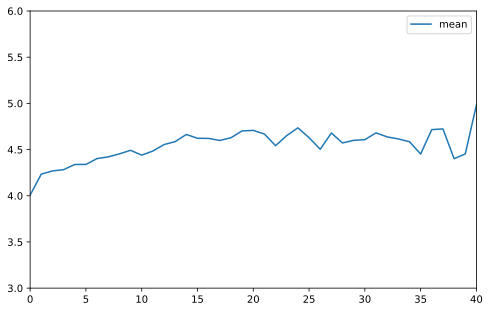

In [49]:
# plot median, mean, variance, 90 percentile and 10 percentile
plt.figure(figsize=(8,5))
#plt.plot(list(median_dict.keys()), list(median_dict.values()), label='median')
plt.plot(list(mean_dict.keys()), list(mean_dict.values()), label='mean')
#plt.plot(list(mean_dict.keys()), [mean_dict[i] + variance_dict[i] for i in mean_dict.keys()], )
#plt.plot(list(mean_dict.keys()), [mean_dict[i] - variance_dict[i] for i in mean_dict.keys()], )
plt.ylim(3, 6)
plt.xlim(0, 40)

#plt.fill_between(list(median_dict.keys()), list(up_percentile_dict.values()), list(low_percentile_dict.values()), alpha=0.2, label='90 percentile')
plt.legend()
plt.show()

# New collaborators per year

In [52]:
# define a function that has the dataframe index as input, and return for every column the len of the list

def new_coauthors_per_year(x):
    #res_dict = {}

    res_dict = {i: np.mean([df_pruned_inv['Size'][paper] for paper in df_authors_years[df_authors_years.index == x][i].values[0] ]) for i in range(upper_bound, int(df['Time'].max() )+1)}

    # find the key with the first > 0 value
    for key, value in res_dict.items():
        if value > 0:
            first_year = key
            break
    
    # find the key with the last > 0 value
    for key, value in reversed(res_dict.items()):
        if value > 0:
            last_year = key
            break
    # create coauthors as empty set

    coauthors = set()
    new_coauthors_dict = {i:0 for i in range(first_year, last_year + 1)}
    fraction_new_coauthors_dict = {i:0 for i in range(first_year, last_year + 1)}
    for year in range(first_year, last_year + 1):
        simplices = df_authors_years[df_authors_years.index == x][year].values[0]
        # for every simplex in simplices, find the coauthors
        new_coauthors = []
        for simplex in simplices:
            new_coauthors += list(df_pruned_inv['Simplices'][simplex])
        new_coauthors = set(new_coauthors) - {x}
        new_coauthors_dict[year]  = len(new_coauthors - coauthors)

            # update coauthors
        coauthors.update(new_coauthors)

        if len(new_coauthors) > 0:
            fraction_new_coauthors_dict[year] = new_coauthors_dict[year] / len(new_coauthors)
        else:
            fraction_new_coauthors_dict[year] = np.nan

    # in the normalize dict keys goes from 0 to last_year - first_year
    normalized_dict = {i:0 for i in range(0, last_year - first_year + 1)}
    normalized_fraction_dict = {i:0 for i in range(0, last_year - first_year + 1)}

    # fill the normalized dict with the values of the res_dict
    for key, value in new_coauthors_dict.items():
        normalized_dict[key - first_year] = value
    for key, value in fraction_new_coauthors_dict.items():
        normalized_fraction_dict[key - first_year] = value

    return normalized_dict, normalized_fraction_dict


In [51]:
new_coauthors_dict = {}
fraction_new_coauthors_dict = {}
for index in tqdm.tqdm(df_authors_years.index[::10]):
    new_coauthors_dict[index], fraction_new_coauthors_dict[index] = new_coauthors_per_year(index)


  0%|          | 144/123860 [00:16<4:02:49,  8.49it/s]


KeyboardInterrupt: 

In [ ]:
with open ('new_coauthors_per_year.pickle', 'wb') as f:
    pickle.dump(new_coauthors_per_year, f)  

with open ('fraction_new_coauthors_dict.pickle', 'wb') as f:
    pickle.dump(fraction_new_coauthors_dict, f)

In [53]:
with open ('new_coauthors_per_year.pickle', 'rb') as f:
    new_coauthors_per_year = pickle.load(f)

with open ('fraction_new_coauthors_dict.pickle', 'rb') as f:
    fraction_new_coauthors_dict = pickle.load(f)

In [54]:
print(len(fraction_new_coauthors_dict))

10000


In [55]:
# do coauthors_over_career_dict_ext
fraction_new_coauthors_dict_ext = fraction_new_coauthors_dict.copy()
# find the maximum duration of a career
max_duration = 0
for key, value in fraction_new_coauthors_dict.items():
    if len(value) > max_duration:
        max_duration = len(value)
print(max_duration)
# modify paper_over_career_dict so that every list has the same length
for key, value in fraction_new_coauthors_dict_ext.items():
    if len(value) < max_duration:
        value.update( {i:np.nan for i in np.linspace(len(value),max_duration,max_duration-len(value)+1)})


66


In [56]:
# calculate median, mean, variance, 90 percentile and 10 percentile
median_dict = {}
mean_dict = {}
variance_dict = {}
up_percentile_dict = {}
low_percentile_dict = {}
for i in range(0, 41):
    median_dict[i] = np.median([value[i] for key, value in fraction_new_coauthors_dict_ext.items() if not np.isnan(value[i]) ])
    mean_dict[i] = np.mean([value[i] for key, value in fraction_new_coauthors_dict_ext.items() if not np.isnan(value[i]) ])
    variance_dict[i] = np.sqrt(np.var([value[i] for key, value in fraction_new_coauthors_dict_ext.items() if not np.isnan(value[i]) ]) )*2
    up_percentile_dict[i] = np.percentile([value[i] for key, value in fraction_new_coauthors_dict_ext.items() if not np.isnan(value[i])], 95)
    low_percentile_dict[i] = np.percentile([value[i] for key, value in fraction_new_coauthors_dict_ext.items() if not np.isnan(value[i]) ], 5)
# print dictionary
print(median_dict)
print(mean_dict)
print(variance_dict)
print(up_percentile_dict)
print(low_percentile_dict)

{0: 1.0, 1: 0.75, 2: 0.7142857142857143, 3: 0.7142857142857143, 4: 0.7222222222222222, 5: 0.7368421052631579, 6: 0.7142857142857143, 7: 0.6923076923076923, 8: 0.7, 9: 0.6666666666666666, 10: 0.6666666666666666, 11: 0.6666666666666666, 12: 0.6666666666666666, 13: 0.6666666666666666, 14: 0.6451612903225806, 15: 0.6666666666666666, 16: 0.625, 17: 0.625, 18: 0.6153846153846154, 19: 0.6120071684587813, 20: 0.6, 21: 0.6, 22: 0.6, 23: 0.5789473684210527, 24: 0.6, 25: 0.5555555555555556, 26: 0.5555555555555556, 27: 0.5263157894736842, 28: 0.5714285714285714, 29: 0.5714285714285714, 30: 0.5790570175438596, 31: 0.5555555555555556, 32: 0.5555555555555556, 33: 0.5714285714285714, 34: 0.5714285714285714, 35: 0.5175492610837439, 36: 0.5638586956521738, 37: 0.5615530303030303, 38: 0.5, 39: 0.5384615384615384, 40: 0.542997542997543}
{0: 1.0, 1: 0.6458244860400673, 2: 0.6423458917324244, 3: 0.6377429133306962, 4: 0.6559491929822442, 5: 0.6625835069172947, 6: 0.6543535946439725, 7: 0.6503943592383765, 8

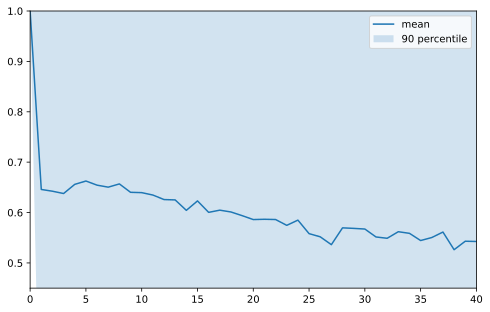

In [57]:
# plot median, mean, variance, 90 percentile and 10 percentile
plt.figure(figsize=(8,5))
#plt.plot(list(median_dict.keys()), list(median_dict.values()), label='median')
plt.plot(list(mean_dict.keys()), list(mean_dict.values()), label='mean')
#plt.plot(list(mean_dict.keys()), [mean_dict[i] + variance_dict[i] for i in mean_dict.keys()], )
#plt.plot(list(mean_dict.keys()), [mean_dict[i] - variance_dict[i] for i in mean_dict.keys()], )
plt.ylim(0.45, 1)
plt.xlim(0, 40)

plt.fill_between(list(median_dict.keys()), list(up_percentile_dict.values()), list(low_percentile_dict.values()), alpha=0.2, label='90 percentile')
plt.legend()
plt.show()

# Distribution of simplices dimension per author per year 

In [58]:
# define a fuction that, given an author, computes the discrete distribution of simplices dimension per each year of his career
def order_distr_per_year(x):
    max_dim = 10

    res_dict = {i: np.mean([df_pruned_inv['Size'][paper] for paper in df_authors_years[df_authors_years.index == x][i].values[0] ]) for i in range(upper_bound, int(df['Time'].max() )+1)}

    # find the key with the first > 0 value
    for key, value in res_dict.items():
        if value > 0:
            first_year = key
            break
    
    # find the key with the last > 0 value
    for key, value in reversed(res_dict.items()):
        if value > 0:
            last_year = key
            break
    #create nan vector
    nan_vector = [np.nan for i in range(0, max_dim)]

    # create a new dictionary with the years as keys and a list of 10 max_dim values as values
    distr_dict = {i:np.zeros(max_dim) for i in range(0, last_year - first_year + 1)}
    # for each year, fill distr_dict with the fraction of simplices of each dimension in that year
    for year in range (first_year,last_year+1):
        simplices = df_authors_years[df_authors_years.index == x][year].values[0]
        for simplex in simplices:
            size= min(df_pruned_inv['Size'][simplex], max_dim)
            distr_dict[year-first_year][size-1] += 1
        if np.sum(distr_dict[year-first_year]) != 0:
            distr_dict[year-first_year] = distr_dict[year-first_year]/np.sum(distr_dict[year-first_year])
        else:
            distr_dict[year-first_year] = nan_vector
    return distr_dict    

In [59]:
distr_dict = {}
for index in tqdm.tqdm(df_authors_years.index[::10]):
    distr_dict[index] = order_distr_per_year(index)

  0%|          | 0/123860 [00:00<?, ?it/s]c:\Users\leona\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\leona\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 27/123860 [00:03<4:32:40,  7.57it/s]


KeyboardInterrupt: 

In [ ]:
with open ('distr_dict.pickle', 'wb') as f:
    pickle.dump(distr_dict, f)  

In [60]:
with open ('distr_dict.pickle', 'rb') as f:
    distr_dict = pickle.load(f)

In [61]:
print(len(distr_dict))

10000


In [62]:
# do coauthors_over_career_dict_ext
distr_dict_ext = distr_dict.copy()
# modify paper_over_career_dict so that every list has the same length
nan_vector = [np.nan for i in range(0,10)]
for key, value in distr_dict_ext.items():
    if len(value) < max_duration:
        value.update( {i:nan_vector for i in np.linspace(len(value),max_duration,max_duration-len(value)+1)})


In [63]:
# calculate median, mean, variance, 90 percentile and 10 percentile
median_dict = {}
mean_dict = {}
variance_dict = {}
up_percentile_dict = {}
low_percentile_dict = {}
for i in range(0, 41):
    median_dict[i] = np.median([value[i] for key, value in distr_dict_ext.items() if not np.isnan(value[i]).all() ],axis=0)
    mean_dict[i] = np.mean([value[i] for key, value in distr_dict_ext.items() if not np.isnan(value[i]).all() ],axis=0)
    variance_dict[i] = np.sqrt(np.var([value[i] for key, value in distr_dict_ext.items() if not np.isnan(value[i]).all() ],axis=0) )*2
    up_percentile_dict[i] = np.percentile([value[i] for key, value in distr_dict_ext.items() if not np.isnan(value[i]).all()], 95,axis=0)
    low_percentile_dict[i] = np.percentile([value[i] for key, value in distr_dict_ext.items() if not np.isnan(value[i]).all() ], 5,axis=0)
# print dictionary
print(median_dict)
print(mean_dict)
print(variance_dict)
print(up_percentile_dict)
print(low_percentile_dict)

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 2: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 3: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 4: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 5: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 6: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 7: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 8: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 9: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 10: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 11: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 12: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 13: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 14: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 15: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 16: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 17: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 18: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 19

Text(0, 0.5, 'Fraction')

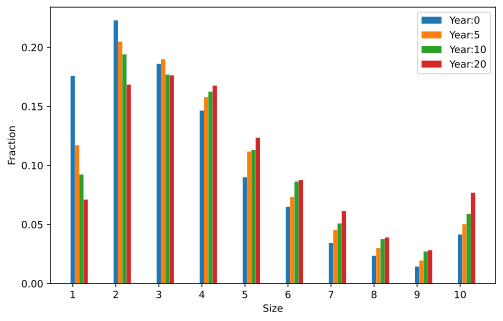

In [65]:
# plot bar plot for year from 0 to 10
plt.figure(figsize=(8,5))
for i,year in enumerate([0,5,10,20]):
    plt.bar(np.arange(10)+i*0.1, mean_dict[year], width=0.1, label= f'Year:{year}')

plt.xticks(np.arange(10), np.arange(1,11));
plt.legend()
plt.xlabel('Size')
plt.ylabel('Fraction')

Text(0, 0.5, 'Fraction')

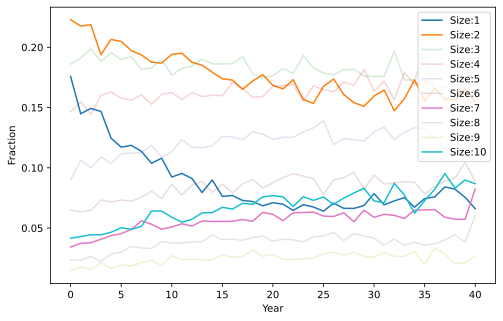

In [66]:
# plot a plt.plot with x is the year and y is the fraction of simplices of each dimension, for each dimension

plt.figure(figsize=(8,5))

good_sizes = [1,2,7,10]
for i in range(0,10):
    if i+1 in good_sizes:
        plt.plot(np.arange(0,41), [mean_dict[j][i] for j in range(0,41)], label=f'Size:{i+1}')
    else:
        plt.plot(np.arange(0,41), [mean_dict[j][i] for j in range(0,41)], label=f'Size:{i+1}', alpha=0.2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Fraction')  
